## Credit Card Fraud Detection using CNN

In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.layers import Conv1D, MaxPool1D
from tensorflow.keras.optimizers import Adam
print(tf.__version__)

2.6.2


In [2]:
import pandas as pd
import numpy as np
import  seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [3]:
# data = pd.read_txt('brazilian credit card.txt')
data = pd.read_csv('brazilian credit card.txt',sep="\t")

data.head()

,mcc_cat numeric,mcc_ant_cat numeric,cep_cat numeric,cep_ant_cat numeric,valor_trans_cat numeric,valor_trans_ant_cat numeric,pos_entry numeric,lim_cred_cat numeric,bandeira_cat numeric,variante_cat numeric,score_cat numeric,tp_pessoa_cat numeric,trans_nacional_cat numeric,qtde_parc_cat numeric,velocidade_cat numeric,dif_score_cat numeric,trans_limit_cat numeric,Class
0,9,22,3,3,6,6,2,6,2,3,0,1,0,1,7,1,0,0
1,22,22,3,3,7,7,2,6,2,3,0,1,0,1,4,4,0,0
2,22,22,3,3,7,7,2,6,2,3,3,1,0,1,6,5,0,1
3,9,0,2,0,4,1,2,4,2,3,0,1,0,1,2,3,0,0
4,15,9,2,2,4,4,2,4,2,3,0,1,0,1,3,3,0,0


In [4]:
data.shape

(374823, 18)

In [5]:
data.isnull().sum()

mcc_cat numeric                0
mcc_ant_cat numeric            0
cep_cat numeric                0
cep_ant_cat numeric            0
valor_trans_cat numeric        0
valor_trans_ant_cat numeric    0
pos_entry numeric              0
lim_cred_cat numeric           0
bandeira_cat numeric           0
variante_cat numeric           0
score_cat numeric              0
tp_pessoa_cat numeric          0
trans_nacional_cat numeric     0
qtde_parc_cat numeric          0
velocidade_cat numeric         0
dif_score_cat numeric          0
trans_limit_cat numeric        0
Class                          0
dtype: int64

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374823 entries, 0 to 374822
Data columns (total 18 columns):
 #   Column                       Non-Null Count   Dtype
---  ------                       --------------   -----
 0   mcc_cat numeric              374823 non-null  int64
 1   mcc_ant_cat numeric          374823 non-null  int64
 2   cep_cat numeric              374823 non-null  int64
 3   cep_ant_cat numeric          374823 non-null  int64
 4   valor_trans_cat numeric      374823 non-null  int64
 5   valor_trans_ant_cat numeric  374823 non-null  int64
 6   pos_entry numeric            374823 non-null  int64
 7   lim_cred_cat numeric         374823 non-null  int64
 8   bandeira_cat numeric         374823 non-null  int64
 9   variante_cat numeric         374823 non-null  int64
 10  score_cat numeric            374823 non-null  int64
 11  tp_pessoa_cat numeric        374823 non-null  int64
 12  trans_nacional_cat numeric   374823 non-null  int64
 13  qtde_parc_cat numeric        

In [7]:
data['Class'].value_counts()

0    360792
1     14031
Name: Class, dtype: int64

In [8]:
X = data.drop('Class', axis = 1)
y = data['Class']

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0, stratify = y)

In [10]:
X_train.shape, X_test.shape

((299858, 17), (74965, 17))

In [11]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [12]:
y_train = y_train.to_numpy()
y_test = y_test.to_numpy()

In [13]:
X_train.shape

(299858, 17)

In [14]:
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

In [15]:
X_train.shape, X_test.shape

((299858, 17, 1), (74965, 17, 1))

### Build CNN 

In [16]:
epochs = 500
model = Sequential()
model.add(Conv1D(32, 2, activation='relu', input_shape = X_train[0].shape))
model.add(BatchNormalization())
model.add(Dropout(0.2))

model.add(Conv1D(64, 2, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(1, activation='sigmoid'))

In [17]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d (Conv1D)              (None, 16, 32)            96        
_________________________________________________________________
batch_normalization (BatchNo (None, 16, 32)            128       
_________________________________________________________________
dropout (Dropout)            (None, 16, 32)            0         
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 15, 64)            4160      
_________________________________________________________________
batch_normalization_1 (Batch (None, 15, 64)            256       
_________________________________________________________________
dropout_1 (Dropout)          (None, 15, 64)            0         
_________________________________________________________________
flatten (Flatten)            (None, 960)               0

In [18]:
model.compile(optimizer='adam', loss = 'binary_crossentropy', metrics=['accuracy','Precision','Recall'])

In [19]:
history = model.fit(X_train, y_train, epochs=epochs,batch_size=500, validation_data=(X_test, y_test), verbose=1)

Epoch 1/500
600/600 [==============================] - 8s 12ms/step - loss: 0.1464 - accuracy: 0.9563 - precision: 0.2060 - recall: 0.0589 - val_loss: 0.1085 - val_accuracy: 0.9626 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 2/500
600/600 [==============================] - 7s 12ms/step - loss: 0.1187 - accuracy: 0.9625 - precision: 0.4816 - recall: 0.0128 - val_loss: 0.1049 - val_accuracy: 0.9628 - val_precision: 0.8519 - val_recall: 0.0082
Epoch 3/500
600/600 [==============================] - 7s 12ms/step - loss: 0.1140 - accuracy: 0.9628 - precision: 0.5407 - recall: 0.0486 - val_loss: 0.1018 - val_accuracy: 0.9628 - val_precision: 0.8696 - val_recall: 0.0071
Epoch 4/500
600/600 [==============================] - 7s 12ms/step - loss: 0.1109 - accuracy: 0.9633 - precision: 0.5875 - recall: 0.0664 - val_loss: 0.0995 - val_accuracy: 0.9643 - val_precision: 0.6864 - val_recall: 0.0866
Epoch 5/500
600/600 [==============================] - 7s 12ms/step - loss: 0.1089 - acc

600/600 [==============================] - 7s 12ms/step - loss: 0.0826 - accuracy: 0.9710 - precision: 0.7546 - recall: 0.3348 - val_loss: 0.0624 - val_accuracy: 0.9777 - val_precision: 0.9376 - val_recall: 0.4341
Epoch 38/500
600/600 [==============================] - 7s 12ms/step - loss: 0.0832 - accuracy: 0.9705 - precision: 0.7461 - recall: 0.3225 - val_loss: 0.0617 - val_accuracy: 0.9778 - val_precision: 0.9432 - val_recall: 0.4323
Epoch 39/500
600/600 [==============================] - 7s 12ms/step - loss: 0.0832 - accuracy: 0.9708 - precision: 0.7519 - recall: 0.3278 - val_loss: 0.0607 - val_accuracy: 0.9773 - val_precision: 0.9679 - val_recall: 0.4081
Epoch 40/500
600/600 [==============================] - 7s 12ms/step - loss: 0.0821 - accuracy: 0.9709 - precision: 0.7538 - recall: 0.3322 - val_loss: 0.0600 - val_accuracy: 0.9776 - val_precision: 0.9384 - val_recall: 0.4291
Epoch 41/500
600/600 [==============================] - 7s 12ms/step - loss: 0.0818 - accuracy: 0.9712 - 

600/600 [==============================] - 7s 12ms/step - loss: 0.0748 - accuracy: 0.9734 - precision: 0.7881 - recall: 0.3954 - val_loss: 0.0493 - val_accuracy: 0.9818 - val_precision: 0.9682 - val_recall: 0.5317
Epoch 74/500
600/600 [==============================] - 7s 12ms/step - loss: 0.0756 - accuracy: 0.9731 - precision: 0.7895 - recall: 0.3852 - val_loss: 0.0487 - val_accuracy: 0.9819 - val_precision: 0.9745 - val_recall: 0.5314
Epoch 75/500
600/600 [==============================] - 7s 12ms/step - loss: 0.0755 - accuracy: 0.9732 - precision: 0.7864 - recall: 0.3909 - val_loss: 0.0497 - val_accuracy: 0.9814 - val_precision: 0.9694 - val_recall: 0.5192
Epoch 76/500
600/600 [==============================] - 7s 12ms/step - loss: 0.0754 - accuracy: 0.9734 - precision: 0.7939 - recall: 0.3915 - val_loss: 0.0479 - val_accuracy: 0.9824 - val_precision: 0.9422 - val_recall: 0.5631
Epoch 77/500
600/600 [==============================] - 7s 12ms/step - loss: 0.0749 - accuracy: 0.9734 - 

600/600 [==============================] - 7s 12ms/step - loss: 0.0726 - accuracy: 0.9745 - precision: 0.8044 - recall: 0.4200 - val_loss: 0.0441 - val_accuracy: 0.9829 - val_precision: 0.9757 - val_recall: 0.5577
Epoch 110/500
600/600 [==============================] - 7s 12ms/step - loss: 0.0730 - accuracy: 0.9742 - precision: 0.8040 - recall: 0.4118 - val_loss: 0.0448 - val_accuracy: 0.9834 - val_precision: 0.9688 - val_recall: 0.5748
Epoch 111/500
600/600 [==============================] - 7s 12ms/step - loss: 0.0730 - accuracy: 0.9742 - precision: 0.8016 - recall: 0.4135 - val_loss: 0.0442 - val_accuracy: 0.9838 - val_precision: 0.9676 - val_recall: 0.5859
Epoch 112/500
600/600 [==============================] - 7s 12ms/step - loss: 0.0725 - accuracy: 0.9746 - precision: 0.8062 - recall: 0.4235 - val_loss: 0.0444 - val_accuracy: 0.9832 - val_precision: 0.9590 - val_recall: 0.5756
Epoch 113/500
600/600 [==============================] - 7s 12ms/step - loss: 0.0729 - accuracy: 0.974

Epoch 145/500
600/600 [==============================] - 7s 12ms/step - loss: 0.0706 - accuracy: 0.9750 - precision: 0.8113 - recall: 0.4315 - val_loss: 0.0420 - val_accuracy: 0.9843 - val_precision: 0.9667 - val_recall: 0.6009
Epoch 146/500
600/600 [==============================] - 7s 12ms/step - loss: 0.0708 - accuracy: 0.9750 - precision: 0.8142 - recall: 0.4321 - val_loss: 0.0408 - val_accuracy: 0.9851 - val_precision: 0.9673 - val_recall: 0.6226
Epoch 147/500
600/600 [==============================] - 7s 12ms/step - loss: 0.0703 - accuracy: 0.9749 - precision: 0.8080 - recall: 0.4315 - val_loss: 0.0423 - val_accuracy: 0.9845 - val_precision: 0.9708 - val_recall: 0.6033
Epoch 148/500
600/600 [==============================] - 7s 12ms/step - loss: 0.0705 - accuracy: 0.9748 - precision: 0.8077 - recall: 0.4302 - val_loss: 0.0414 - val_accuracy: 0.9846 - val_precision: 0.9785 - val_recall: 0.6009
Epoch 149/500
600/600 [==============================] - 7s 12ms/step - loss: 0.0703 - a

Epoch 181/500
600/600 [==============================] - 7s 12ms/step - loss: 0.0695 - accuracy: 0.9752 - precision: 0.8147 - recall: 0.4375 - val_loss: 0.0398 - val_accuracy: 0.9849 - val_precision: 0.9687 - val_recall: 0.6172
Epoch 182/500
600/600 [==============================] - 7s 12ms/step - loss: 0.0700 - accuracy: 0.9750 - precision: 0.8089 - recall: 0.4338 - val_loss: 0.0389 - val_accuracy: 0.9860 - val_precision: 0.9681 - val_recall: 0.6486
Epoch 183/500
600/600 [==============================] - 7s 12ms/step - loss: 0.0697 - accuracy: 0.9750 - precision: 0.8107 - recall: 0.4343 - val_loss: 0.0403 - val_accuracy: 0.9849 - val_precision: 0.9849 - val_recall: 0.6058
Epoch 184/500
600/600 [==============================] - 7s 12ms/step - loss: 0.0691 - accuracy: 0.9755 - precision: 0.8168 - recall: 0.4447 - val_loss: 0.0395 - val_accuracy: 0.9856 - val_precision: 0.9585 - val_recall: 0.6426
Epoch 185/500
600/600 [==============================] - 7s 12ms/step - loss: 0.0692 - a

Epoch 217/500
600/600 [==============================] - 7s 12ms/step - loss: 0.0681 - accuracy: 0.9757 - precision: 0.8207 - recall: 0.4506 - val_loss: 0.0391 - val_accuracy: 0.9861 - val_precision: 0.9789 - val_recall: 0.6436
Epoch 218/500
600/600 [==============================] - 7s 12ms/step - loss: 0.0687 - accuracy: 0.9753 - precision: 0.8127 - recall: 0.4435 - val_loss: 0.0388 - val_accuracy: 0.9853 - val_precision: 0.9781 - val_recall: 0.6215
Epoch 219/500
600/600 [==============================] - 7s 12ms/step - loss: 0.0683 - accuracy: 0.9755 - precision: 0.8169 - recall: 0.4459 - val_loss: 0.0401 - val_accuracy: 0.9861 - val_precision: 0.9788 - val_recall: 0.6426
Epoch 220/500
600/600 [==============================] - 7s 12ms/step - loss: 0.0685 - accuracy: 0.9758 - precision: 0.8199 - recall: 0.4525 - val_loss: 0.0392 - val_accuracy: 0.9858 - val_precision: 0.9823 - val_recall: 0.6319
Epoch 221/500
600/600 [==============================] - 7s 12ms/step - loss: 0.0682 - a

Epoch 253/500
600/600 [==============================] - 7s 12ms/step - loss: 0.0680 - accuracy: 0.9756 - precision: 0.8179 - recall: 0.4482 - val_loss: 0.0373 - val_accuracy: 0.9866 - val_precision: 0.9813 - val_recall: 0.6547
Epoch 254/500
600/600 [==============================] - 7s 12ms/step - loss: 0.0683 - accuracy: 0.9755 - precision: 0.8146 - recall: 0.4479 - val_loss: 0.0382 - val_accuracy: 0.9863 - val_precision: 0.9780 - val_recall: 0.6486
Epoch 255/500
600/600 [==============================] - 7s 12ms/step - loss: 0.0676 - accuracy: 0.9758 - precision: 0.8225 - recall: 0.4508 - val_loss: 0.0377 - val_accuracy: 0.9868 - val_precision: 0.9784 - val_recall: 0.6625
Epoch 256/500
600/600 [==============================] - 7s 12ms/step - loss: 0.0683 - accuracy: 0.9758 - precision: 0.8207 - recall: 0.4515 - val_loss: 0.0368 - val_accuracy: 0.9863 - val_precision: 0.9734 - val_recall: 0.6518
Epoch 257/500
600/600 [==============================] - 7s 12ms/step - loss: 0.0682 - a

Epoch 289/500
600/600 [==============================] - 7s 12ms/step - loss: 0.0670 - accuracy: 0.9760 - precision: 0.8209 - recall: 0.4599 - val_loss: 0.0375 - val_accuracy: 0.9861 - val_precision: 0.9825 - val_recall: 0.6404
Epoch 290/500
600/600 [==============================] - 7s 12ms/step - loss: 0.0670 - accuracy: 0.9762 - precision: 0.8285 - recall: 0.4601 - val_loss: 0.0354 - val_accuracy: 0.9871 - val_precision: 0.9656 - val_recall: 0.6793
Epoch 291/500
600/600 [==============================] - 7s 12ms/step - loss: 0.0665 - accuracy: 0.9761 - precision: 0.8246 - recall: 0.4596 - val_loss: 0.0362 - val_accuracy: 0.9872 - val_precision: 0.9783 - val_recall: 0.6739
Epoch 292/500
600/600 [==============================] - 7s 12ms/step - loss: 0.0679 - accuracy: 0.9760 - precision: 0.8254 - recall: 0.4549 - val_loss: 0.0373 - val_accuracy: 0.9865 - val_precision: 0.9812 - val_recall: 0.6522
Epoch 293/500
600/600 [==============================] - 7s 12ms/step - loss: 0.0675 - a

Epoch 325/500
600/600 [==============================] - 7s 12ms/step - loss: 0.0668 - accuracy: 0.9761 - precision: 0.8212 - recall: 0.4611 - val_loss: 0.0363 - val_accuracy: 0.9872 - val_precision: 0.9858 - val_recall: 0.6686
Epoch 326/500
600/600 [==============================] - 7s 12ms/step - loss: 0.0661 - accuracy: 0.9765 - precision: 0.8305 - recall: 0.4690 - val_loss: 0.0356 - val_accuracy: 0.9872 - val_precision: 0.9783 - val_recall: 0.6739
Epoch 327/500
600/600 [==============================] - 7s 12ms/step - loss: 0.0669 - accuracy: 0.9762 - precision: 0.8257 - recall: 0.4608 - val_loss: 0.0349 - val_accuracy: 0.9874 - val_precision: 0.9651 - val_recall: 0.6892
Epoch 328/500
600/600 [==============================] - 7s 12ms/step - loss: 0.0664 - accuracy: 0.9763 - precision: 0.8268 - recall: 0.4648 - val_loss: 0.0357 - val_accuracy: 0.9872 - val_precision: 0.9743 - val_recall: 0.6746
Epoch 329/500
600/600 [==============================] - 7s 12ms/step - loss: 0.0663 - a

Epoch 361/500
600/600 [==============================] - 7s 12ms/step - loss: 0.0661 - accuracy: 0.9761 - precision: 0.8260 - recall: 0.4585 - val_loss: 0.0350 - val_accuracy: 0.9879 - val_precision: 0.9722 - val_recall: 0.6967
Epoch 362/500
600/600 [==============================] - 7s 12ms/step - loss: 0.0665 - accuracy: 0.9763 - precision: 0.8259 - recall: 0.4661 - val_loss: 0.0357 - val_accuracy: 0.9871 - val_precision: 0.9787 - val_recall: 0.6707
Epoch 363/500
600/600 [==============================] - 7s 12ms/step - loss: 0.0658 - accuracy: 0.9763 - precision: 0.8199 - recall: 0.4687 - val_loss: 0.0348 - val_accuracy: 0.9874 - val_precision: 0.9701 - val_recall: 0.6832
Epoch 364/500
600/600 [==============================] - 7s 12ms/step - loss: 0.0665 - accuracy: 0.9762 - precision: 0.8237 - recall: 0.4627 - val_loss: 0.0369 - val_accuracy: 0.9868 - val_precision: 0.9805 - val_recall: 0.6614
Epoch 365/500
600/600 [==============================] - 7s 12ms/step - loss: 0.0669 - a

Epoch 397/500
600/600 [==============================] - 7s 12ms/step - loss: 0.0669 - accuracy: 0.9760 - precision: 0.8172 - recall: 0.4636 - val_loss: 0.0350 - val_accuracy: 0.9874 - val_precision: 0.9794 - val_recall: 0.6789
Epoch 398/500
600/600 [==============================] - 7s 12ms/step - loss: 0.0661 - accuracy: 0.9764 - precision: 0.8239 - recall: 0.4701 - val_loss: 0.0354 - val_accuracy: 0.9869 - val_precision: 0.9780 - val_recall: 0.6661
Epoch 399/500
600/600 [==============================] - 7s 12ms/step - loss: 0.0660 - accuracy: 0.9763 - precision: 0.8261 - recall: 0.4639 - val_loss: 0.0354 - val_accuracy: 0.9864 - val_precision: 0.9725 - val_recall: 0.6561
Epoch 400/500
600/600 [==============================] - 7s 12ms/step - loss: 0.0665 - accuracy: 0.9762 - precision: 0.8235 - recall: 0.4640 - val_loss: 0.0347 - val_accuracy: 0.9874 - val_precision: 0.9794 - val_recall: 0.6764
Epoch 401/500
600/600 [==============================] - 7s 12ms/step - loss: 0.0653 - a

Epoch 433/500
600/600 [==============================] - 7s 12ms/step - loss: 0.0655 - accuracy: 0.9767 - precision: 0.8299 - recall: 0.4733 - val_loss: 0.0346 - val_accuracy: 0.9872 - val_precision: 0.9798 - val_recall: 0.6732
Epoch 434/500
600/600 [==============================] - 7s 12ms/step - loss: 0.0660 - accuracy: 0.9765 - precision: 0.8299 - recall: 0.4675 - val_loss: 0.0350 - val_accuracy: 0.9873 - val_precision: 0.9631 - val_recall: 0.6878
Epoch 435/500
600/600 [==============================] - 7s 12ms/step - loss: 0.0668 - accuracy: 0.9761 - precision: 0.8188 - recall: 0.4628 - val_loss: 0.0343 - val_accuracy: 0.9875 - val_precision: 0.9820 - val_recall: 0.6796
Epoch 436/500
600/600 [==============================] - 7s 12ms/step - loss: 0.0662 - accuracy: 0.9764 - precision: 0.8231 - recall: 0.4693 - val_loss: 0.0364 - val_accuracy: 0.9867 - val_precision: 0.9861 - val_recall: 0.6550
Epoch 437/500
600/600 [==============================] - 7s 12ms/step - loss: 0.0667 - a

Epoch 469/500
600/600 [==============================] - 7s 12ms/step - loss: 0.0654 - accuracy: 0.9766 - precision: 0.8296 - recall: 0.4722 - val_loss: 0.0342 - val_accuracy: 0.9883 - val_precision: 0.9786 - val_recall: 0.7021
Epoch 470/500
600/600 [==============================] - 7s 12ms/step - loss: 0.0652 - accuracy: 0.9766 - precision: 0.8308 - recall: 0.4724 - val_loss: 0.0339 - val_accuracy: 0.9880 - val_precision: 0.9784 - val_recall: 0.6949
Epoch 471/500
600/600 [==============================] - 7s 12ms/step - loss: 0.0656 - accuracy: 0.9764 - precision: 0.8211 - recall: 0.4712 - val_loss: 0.0349 - val_accuracy: 0.9871 - val_precision: 0.9822 - val_recall: 0.6671
Epoch 472/500
600/600 [==============================] - 7s 12ms/step - loss: 0.0652 - accuracy: 0.9766 - precision: 0.8296 - recall: 0.4722 - val_loss: 0.0339 - val_accuracy: 0.9884 - val_precision: 0.9745 - val_recall: 0.7078
Epoch 473/500
600/600 [==============================] - 7s 12ms/step - loss: 0.0652 - a

In [20]:
# predict probabilities for test set
yhat_probs = model.predict(X_test, verbose=0)
# reduce to 1d array
yhat_probs = yhat_probs[:, 0]> 0.5

In [21]:
# demonstration of calculating metrics for a neural network model using sklearn
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix

# accuracy: (tp + tn) / (p + n)
accuracy = accuracy_score(y_test, yhat_probs)
print('Accuracy: %f' % accuracy)
# precision tp / (tp + fp)
precision = precision_score(y_test, yhat_probs)
print('Precision: %f' % precision)
# recall: tp / (tp + fn)
recall = recall_score(y_test, yhat_probs)
print('Recall: %f' % recall)
f1 = f1_score(y_test, yhat_probs)
print('f1: %f' % f1)

Accuracy: 0.988395
Precision: 0.980636
Recall: 0.703849
f1: 0.819502


In [22]:
def plot_learningCurve(history, epoch):
  # Plot training & validation accuracy values
  epoch_range = range(1, epoch+1)
  plt.plot(epoch_range, history.history['accuracy'])
  plt.plot(epoch_range, history.history['val_accuracy'])
  plt.title('Model accuracy')
  plt.ylabel('Accuracy')
  plt.xlabel('Epoch')
  plt.legend(['Train', 'Val'], loc='upper left')
  plt.show()

  # Plot training & validation loss values
  plt.plot(epoch_range, history.history['loss'])
  plt.plot(epoch_range, history.history['val_loss'])
  plt.title('Model loss')
  plt.ylabel('Loss')
  plt.xlabel('Epoch')
  plt.legend(['Train', 'Val'], loc='upper left')
  plt.show()

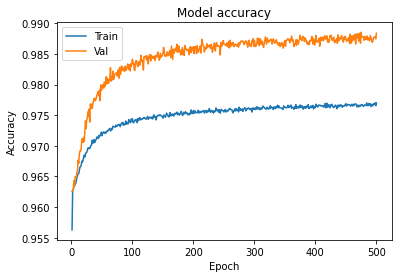

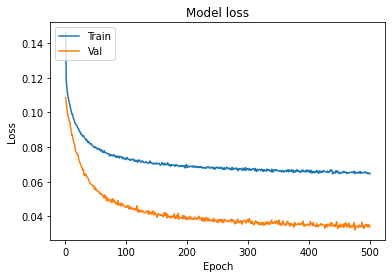

In [23]:
plot_learningCurve(history, epochs)